In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math


import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [4]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan 2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan 2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan 2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan 2020-01-04          0.0        0.0   
...        ...       ...            ...        ...          ...        ...   
34238      NaN       NaN  International 2020-02-28        705.0        0.0   
34239      NaN       NaN  International 2020-02-29        705.0        0.0   
34240      NaN       NaN  International 2020-03-01        705.0        0.0   
34241      NaN       NaN  International 2020-03-02        705.0        0.0   
34242      NaN       NaN  International 2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
0               0.0         0.0                      0.0   
1               0.0         0.0                      0.0   
2               0.0         0.0                      0.0   
3               0.0         0.0                      0.0   
4               0.0         0.0                      0.0   
...             ...         ...                      ...   
34238           4.0         0.0                      NaN   
34239           6.0         2.0                      NaN   
34240           6.0         0.0                      NaN   
34241           6.0         0.0                      NaN   
34242           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                        0.0  ...          1.337        1803.987   
1                        0.0  ...          1.337        1803.987   
2                        0.0  ...          1.337        1803.987   
3                        0.0  ...          1.337        1803.987   
4                        0.0  ...          1.337        1803.987   
...                      ...  ...            ...             ...   
34238                    NaN  ...            NaN             NaN   
34239                    NaN  ...            NaN             NaN   
34240                    NaN  ...            NaN             NaN   
34241                    NaN  ...            NaN             NaN   
34242                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  NaN                597.029                 9.59   
1                  NaN                597.029                 9.59   
2                  NaN                597.029                 9.59   
3                  NaN                597.029                 9.59   
4                  NaN                597.029                 9.59   
...                ...                    ...                  ...   
34238              NaN                    NaN                  NaN   
34239              NaN                    NaN                  NaN   
34240              NaN                    NaN                  NaN   
34241              NaN                    NaN                  NaN   
34242              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
0                 NaN           NaN                  37.746   
1                 NaN           NaN                  37.746   
2                 NaN           NaN                  37.746   
3                 NaN           NaN                  37.746   
4                 NaN           NaN                  37.746   
...               ...           ...                     ...   
34238             NaN           NaN                     NaN   
34239             NaN           NaN                     NaN   
34240             NaN           NaN                     NaN   
34241             NaN           NaN                     NaN 

### Analysis of the last N days

In [5]:
Ndays = '150days'

In [6]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date              location  total_cases  total_deaths  new_cases  \
21514 2020-03-17               Myanmar          0.0           0.0        0.0   
24118 2020-04-06      Papua New Guinea          1.0           0.0        0.0   
24117 2020-04-05      Papua New Guinea          1.0           0.0        0.0   
24116 2020-04-04      Papua New Guinea          1.0           0.0        0.0   
24115 2020-04-03      Papua New Guinea          1.0           0.0        0.0   
...          ...                   ...          ...           ...        ...   
31987 2020-03-07  United Arab Emirates          NaN           NaN        NaN   
31989 2020-03-09  United Arab Emirates          NaN           NaN        NaN   
31992 2020-03-12  United Arab Emirates          NaN           NaN        NaN   
31994 2020-03-14  United Arab Emirates          NaN           NaN        NaN   
33327 2020-03-06               Vietnam          NaN           NaN        NaN   

       new_deaths  
21514         0.0  
24118         0.0  
24117         0.0  
24116         0.0  
24115         0.0  
...           ...  
31987         NaN  
31989         NaN  
31992         NaN  
31994         NaN  
33327         NaN  

[29622 rows x 6 columns]

# 1. Number of cases and deaths in World

In [7]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-06      98705.0        3384.0     3059.0       102.0
1   2020-03-07     102842.0        3488.0     4137.0       104.0
2   2020-03-08     106812.0        3585.0     3970.0        97.0
3   2020-03-09     110984.0        3813.0     4172.0       228.0
4   2020-03-10     115746.0        4021.0     4762.0       208.0
..         ...          ...           ...        ...         ...
145 2020-07-29   16713047.0      660143.0   243602.0      6260.0
146 2020-07-30   17011169.0      666862.0   298122.0      6719.0
147 2020-07-31   17301496.0      673293.0   290327.0      6431.0
148 2020-08-01   17579842.0      679502.0   278346.0      6209.0
149 2020-08-02   17841669.0      685281.0   261827.0      5779.0

[150 rows x 5 columns]

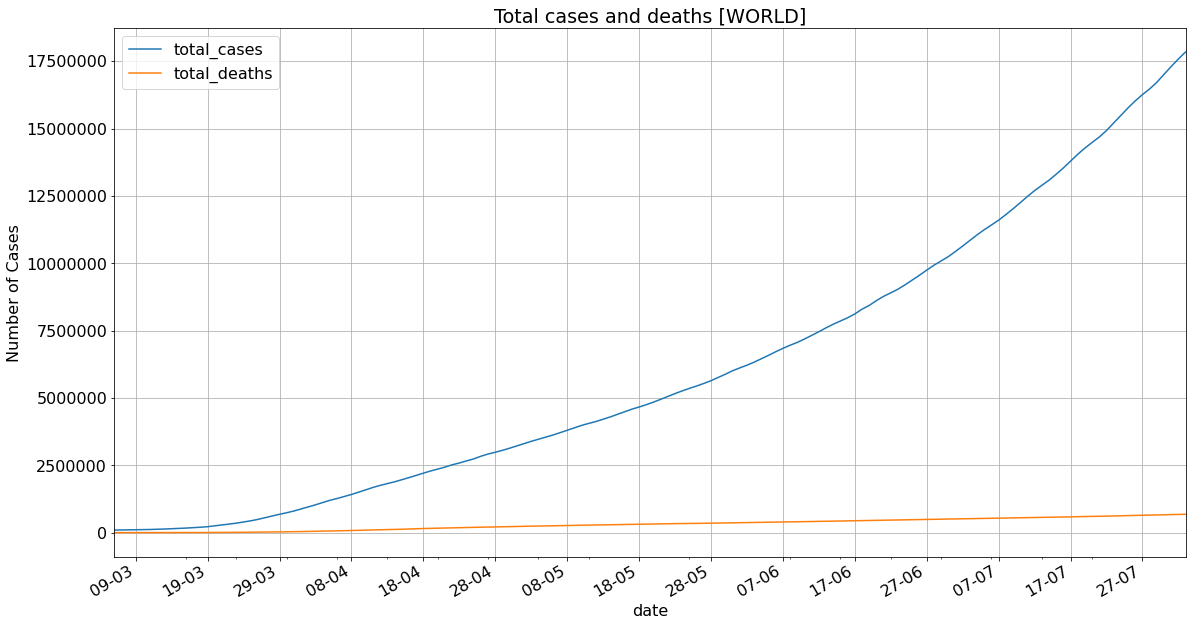

In [8]:
dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases and deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New deaths per day

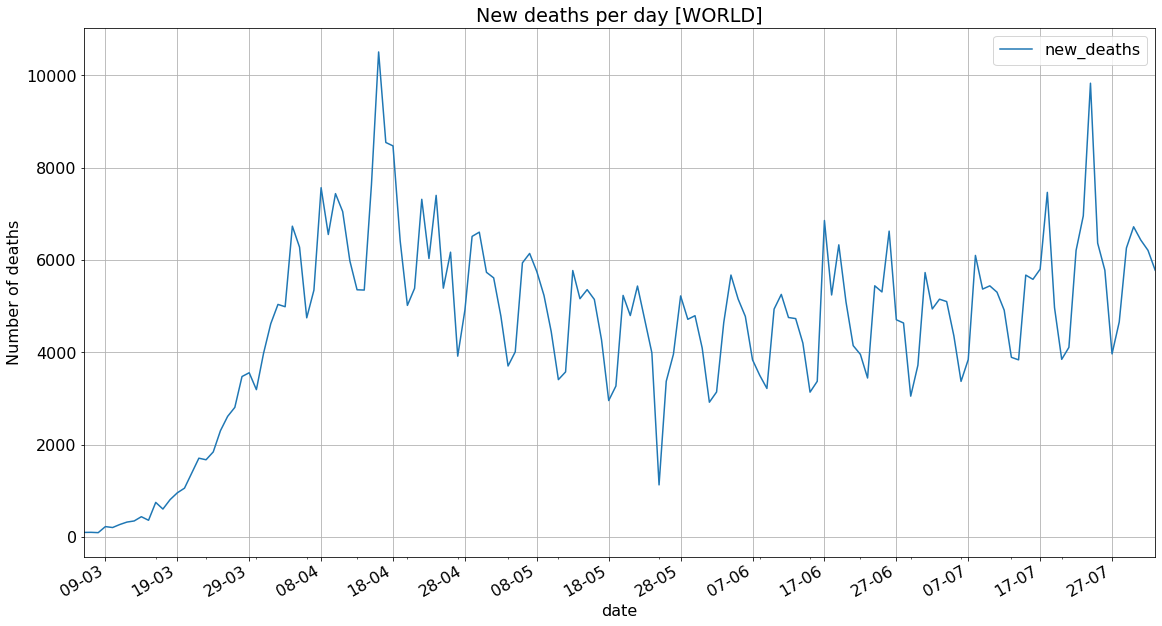

In [9]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('New deaths per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New cases per day

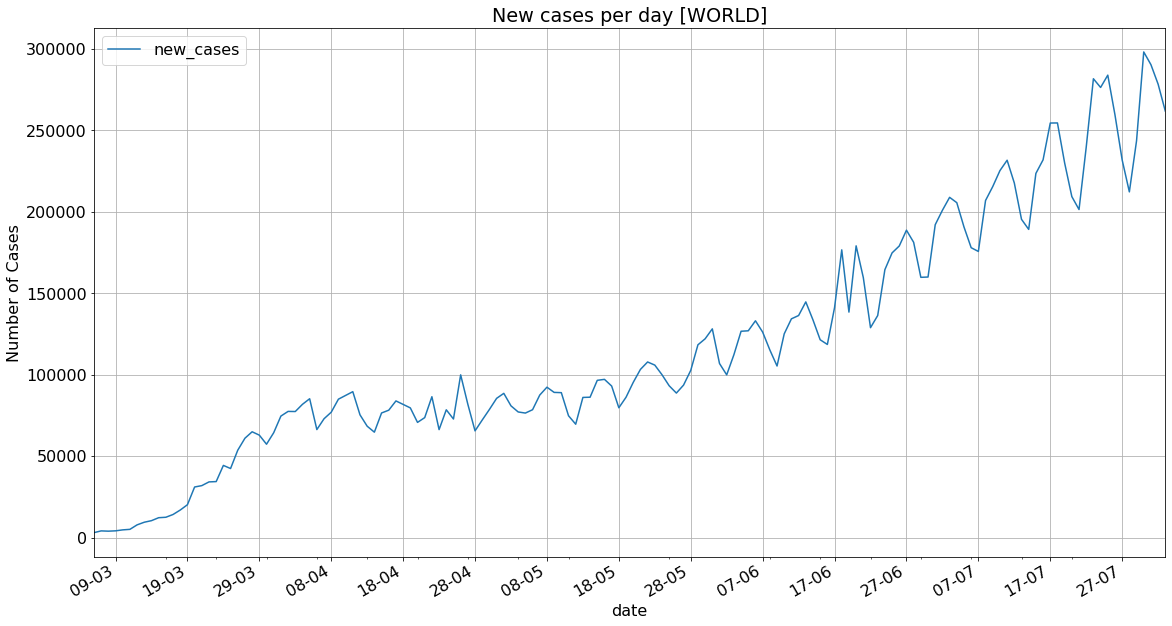

In [10]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

# 2. Selecting Countries by the following conditions: 50k total cases and 35k deaths.

In [11]:
myDate = df['date'].astype(str).unique()

### Countries that have, at least, 50k cases and 35k deaths

In [12]:
mainCountries = df[
        (df['total_cases'] > 50000) & 
        (df['total_deaths'] > 35000) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries

date        location  total_cases  total_deaths  new_cases  \
32567 2020-08-02   United_States    4620444.0      154447.0    58407.0   
32566 2020-08-01   United_States    4562037.0      153314.0    67023.0   
32565 2020-07-31   United_States    4495014.0      152070.0    68032.0   
32564 2020-07-30   United_States    4426982.0      150713.0    74985.0   
32563 2020-07-29   United_States    4351997.0      149256.0    61734.0   
...          ...             ...          ...           ...        ...   
32281 2020-05-24  United_Kingdom     243081.0       36734.0     2062.0   
32280 2020-05-23  United_Kingdom     241019.0       36451.0     2574.0   
32279 2020-05-22  United_Kingdom     238445.0       36093.0     2718.0   
32278 2020-05-21  United_Kingdom     235727.0       35755.0     3052.0   
32277 2020-05-20  United_Kingdom     232675.0       35386.0     2589.0   

       new_deaths  
32567      1133.0  
32566      1244.0  
32565      1357.0  
32564      1457.0  
32563      1245.0  
...           ...  
32281       283.0  
32280       358.0  
32279       338.0  
32278       369.0  
32277       548.0  

[281 rows x 6 columns]

In [13]:
dfCountry = mainCountries['location'].astype(str).unique()

In [14]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

## Total cases in the main countries

In [15]:
totalCases_list=[]
totalDeaths_list=[]
newCases_list=[]
newDeaths_list=[]

for index in range(len(dfCountry)):  
    
    totalCases = [d[index]['total_cases']]
    totalDeaths = [d[index]['total_deaths']]
    newCases = [d[index]['new_cases']]
    newDeaths = [d[index]['new_deaths']]
    
    header = [dfCountry[index]]
    
    totalCases = pd.concat(totalCases, axis=1, keys=header)
    totalDeaths = pd.concat(totalDeaths, axis=1, keys=header)
    newCases = pd.concat(newCases, axis=1, keys=header)
    newDeaths = pd.concat(newDeaths, axis=1, keys=header)
    
    totalCases_list.append(totalCases)
    totalDeaths_list.append(totalDeaths)
    newCases_list.append(newCases)
    newDeaths_list.append(newDeaths)

In [16]:
dfTotalCases=[]
dfTotalDeaths=[]
dfNewCases=[]
dfNewDeaths=[]
for index in range(len(dfCountry)):
    dfTotalCases = pd.concat(totalCases_list, axis=1)
    dfTotalDeaths = pd.concat(totalDeaths_list, axis=1)
    dfNewCases = pd.concat(newCases_list, axis=1)
    dfNewDeaths = pd.concat(newDeaths_list,axis=1)
    
dfTotalCases.insert(0, 'date', myDate)
dfTotalDeaths.insert(0, 'date', myDate)
dfNewCases.insert(0, 'date', myDate)
dfNewDeaths.insert(0, 'date', myDate)

### Total Cases per Country

In [17]:
dfTotalCases.sort_values(by=['date'], ascending=False)

date  United_States    Brazil     India    Mexico  United_Kingdom  \
88  2020-08-02      1811277.0  526447.0  207615.0  113619.0        256594.0   
89  2020-08-01      1831821.0  555383.0  216919.0  117103.0        258035.0   
90  2020-07-31      1851520.0  584016.0  226770.0  120102.0        259519.0   
91  2020-07-30      1872660.0  614932.0  236657.0  124301.0        260875.0   
92  2020-07-29      1897838.0  645762.0  246628.0  129184.0        262118.0   
..         ...            ...       ...       ...       ...             ...   
8   2020-03-10         2174.0      98.0      90.0     118.0          1766.0   
65  2020-03-09      1309541.0  155939.0   67152.0   42595.0        206234.0   
47  2020-03-08       825041.0   43079.0   21393.0   14677.0        130119.0   
23  2020-03-07       124665.0    3904.0    1071.0    1510.0         24001.0   
28  2020-03-06       245540.0    7910.0    2902.0    2785.0         43381.0   

       Italy  
88  233197.0  
89  233515.0  
90  233836.0  
91  234013.0  
92  234531.0  
..       ...  
8    17660.0  
65  218268.0  
47  183957.0  
23   92472.0  
28  115242.0  

[150 rows x 7 columns]

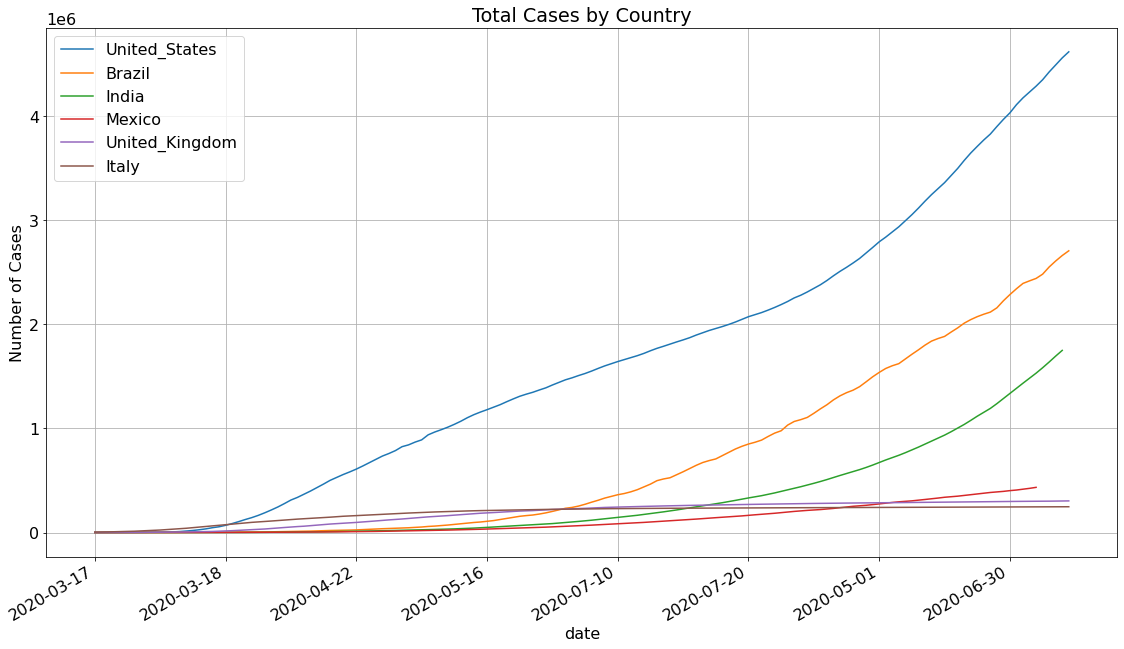

In [18]:
dfTotalCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total Cases by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

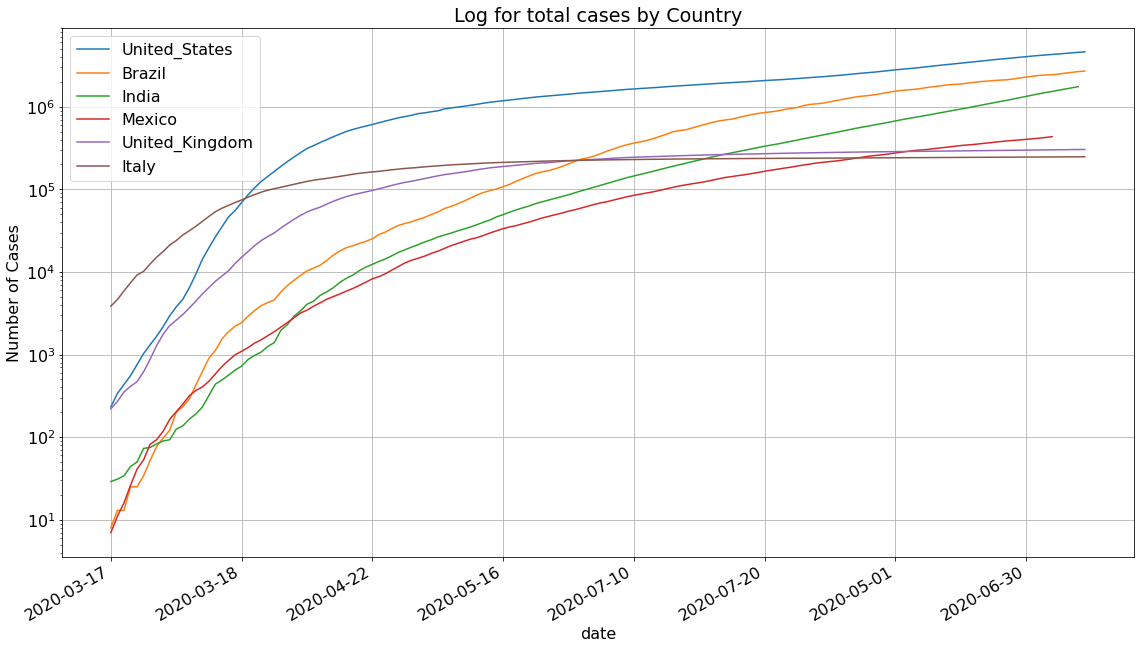

In [19]:
dfTotalCases.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Log for total cases by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total Deaths per Country

In [20]:
dfTotalDeaths.sort_values(by=['date'], ascending=False)

date  United_States   Brazil   India   Mexico  United_Kingdom  \
88  2020-08-02       105147.0  29937.0  5815.0  13511.0         39121.0   
89  2020-08-01       106181.0  31199.0  6075.0  13699.0         39447.0   
90  2020-07-31       107175.0  32548.0  6348.0  14053.0         39812.0   
91  2020-07-30       108211.0  34021.0  6642.0  14649.0         39989.0   
92  2020-07-29       109143.0  35026.0  6929.0  15357.0         40347.0   
..         ...            ...      ...     ...      ...             ...   
8   2020-03-10           47.0      0.0     2.0      0.0            10.0   
65  2020-03-09        78794.0  10627.0  2206.0   4477.0         31611.0   
47  2020-03-08        45063.0   2741.0   681.0   1351.0         20237.0   
23  2020-03-07         2191.0    114.0    29.0     50.0          1456.0   
28  2020-03-06         6053.0    299.0    68.0    141.0          3748.0   

      Italy  
88  33475.0  
89  33530.0  
90  33601.0  
91  33689.0  
92  33774.0  
..      ...  
8    1268.0  
65  30395.0  
47  24648.0  
23  10023.0  
28  13917.0  

[150 rows x 7 columns]

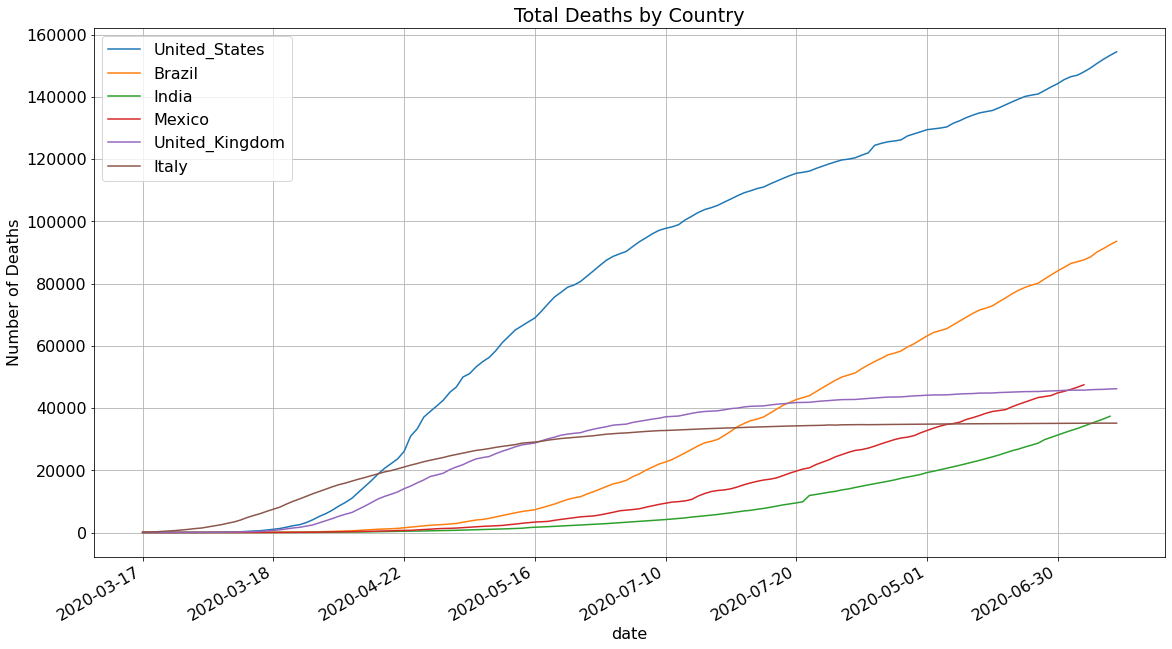

In [21]:
dfTotalDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Deaths')
plt.title('Total Deaths by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

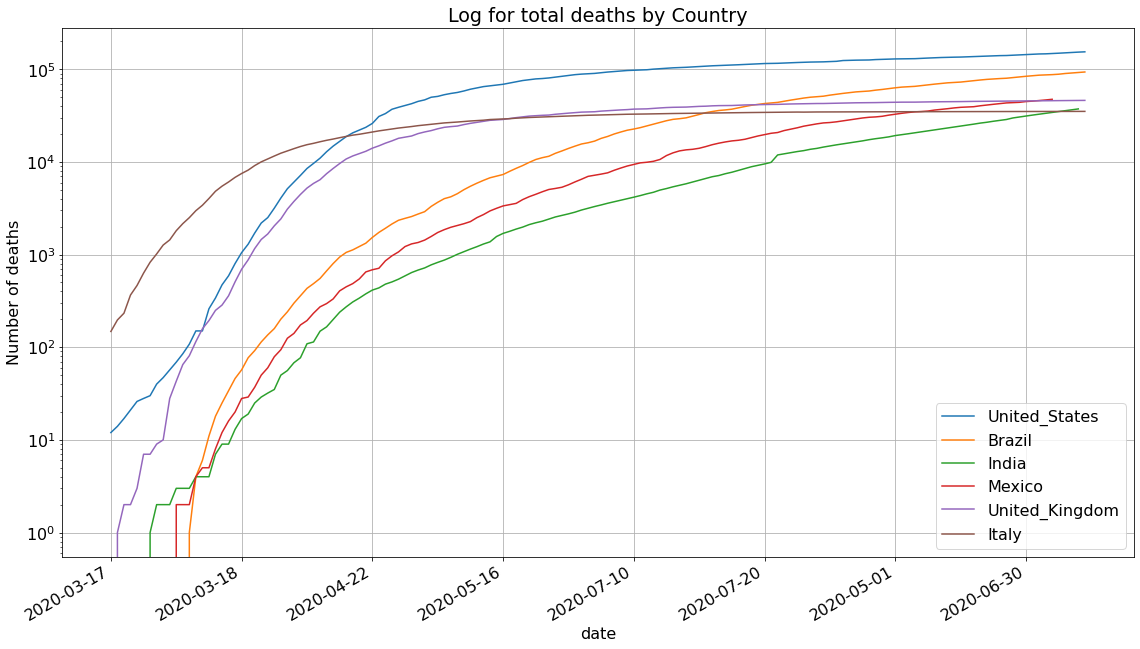

In [22]:
dfTotalDeaths.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Log for total deaths by Country')

ax = plt.gca()
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New Cases per country

In [23]:
dfNewCases.sort_values(by=['date'], ascending=False)

date  United_States   Brazil   India  Mexico  United_Kingdom   Italy
88  2020-08-02        21086.0  11598.0  8909.0  3593.0          1079.0   178.0
89  2020-08-01        20544.0  28936.0  9304.0  3484.0          1441.0   318.0
90  2020-07-31        19699.0  28633.0  9851.0  2999.0          1484.0   321.0
91  2020-07-30        21140.0  30916.0  9887.0  4199.0          1356.0   177.0
92  2020-07-29        25178.0  30830.0  9971.0  4883.0          1243.0   518.0
..         ...            ...      ...     ...     ...             ...     ...
8   2020-03-10          511.0     21.0     7.0    25.0           484.0  2547.0
65  2020-03-09        25612.0  10611.0  4213.0  2409.0          3063.0  1083.0
47  2020-03-08        37289.0   2498.0  1409.0   835.0          4854.0  2729.0
23  2020-03-07        19979.0    487.0    92.0   132.0          3197.0  5974.0
28  2020-03-06        28819.0   1074.0   601.0   346.0          4913.0  4668.0

[150 rows x 7 columns]

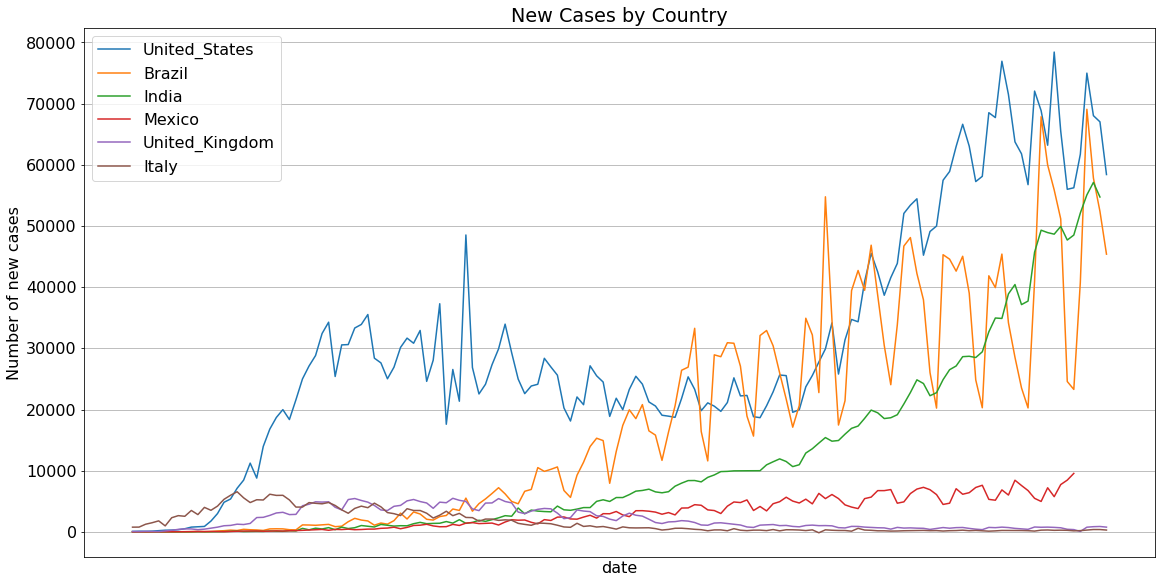

In [24]:
dfNewCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of new cases')
plt.title('New Cases by Country')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### New cases and new deaths per day

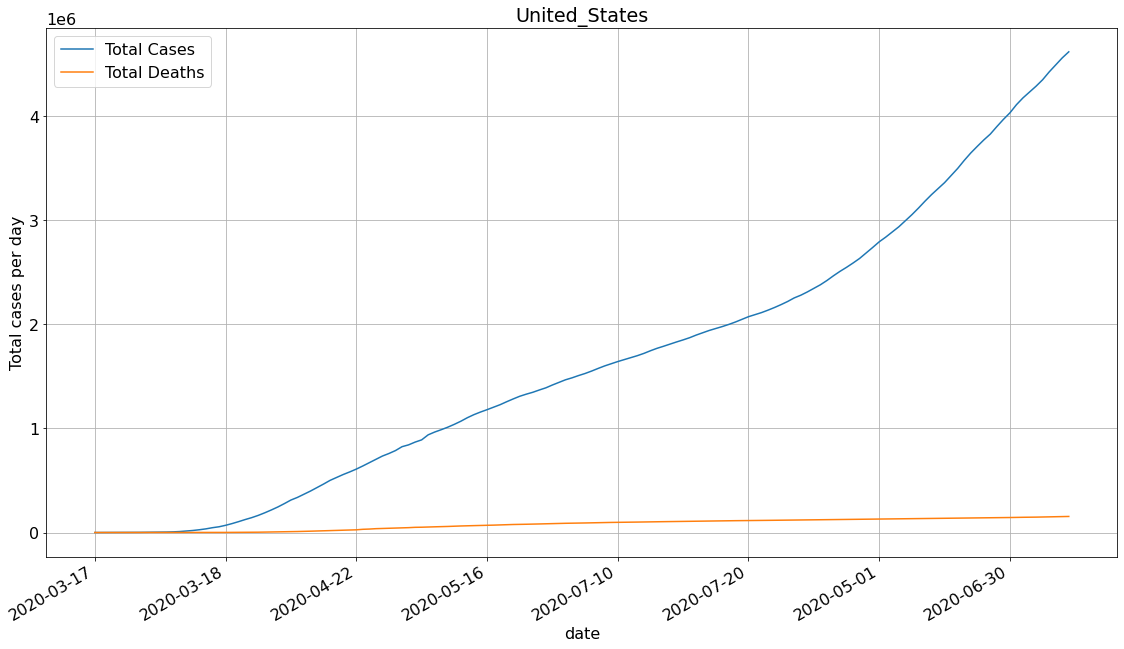

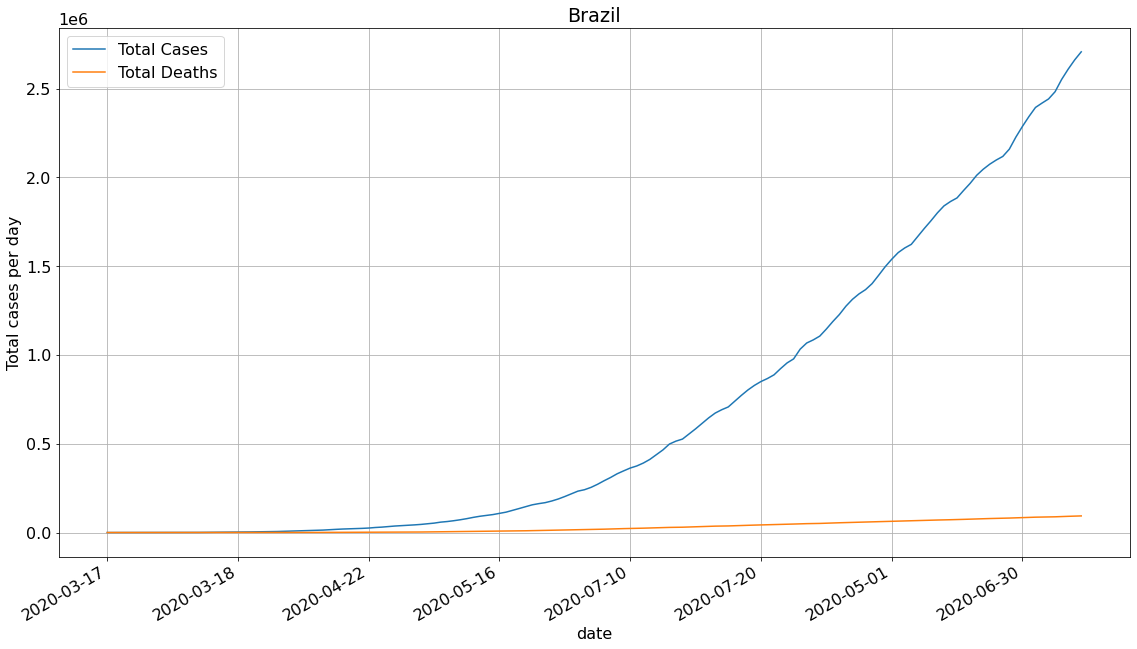

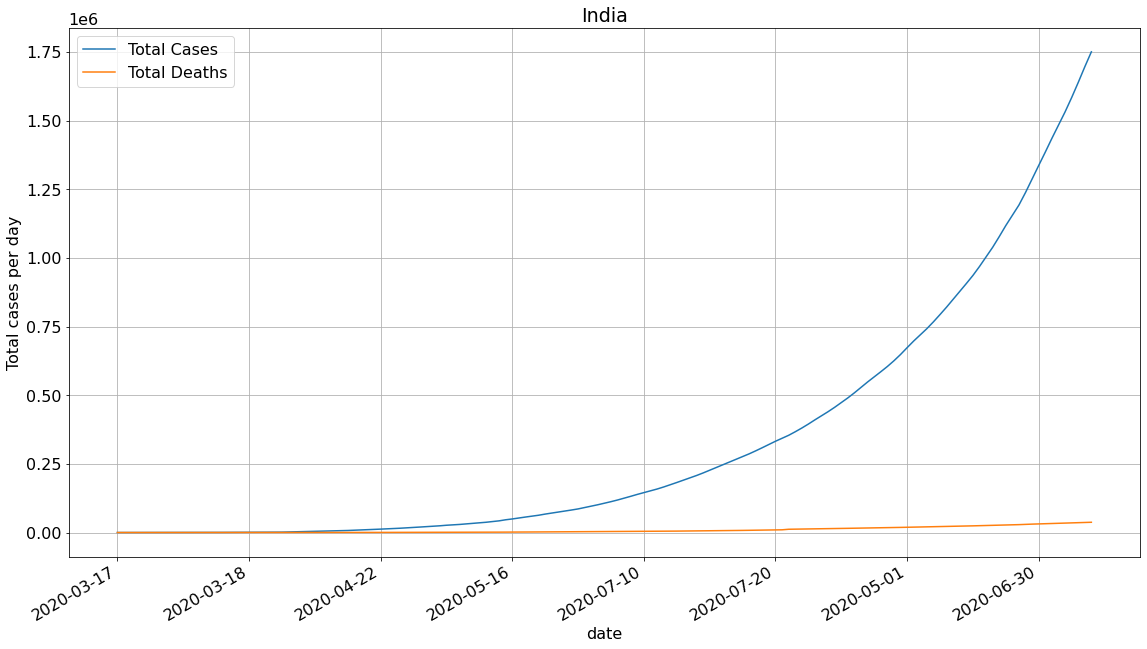

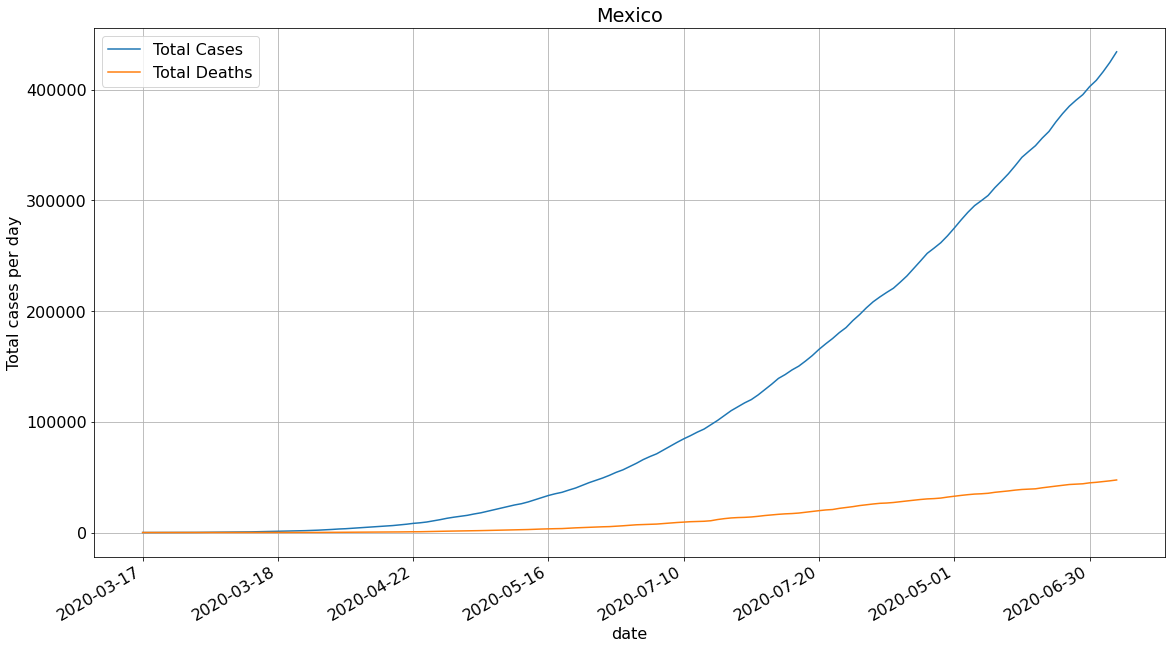

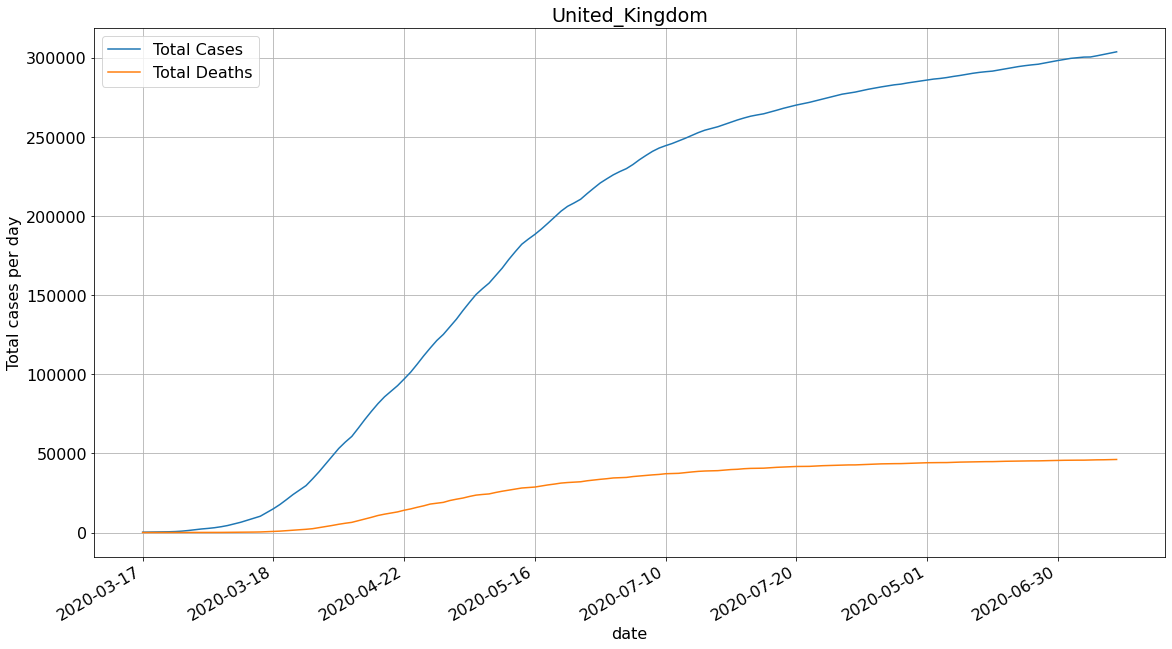

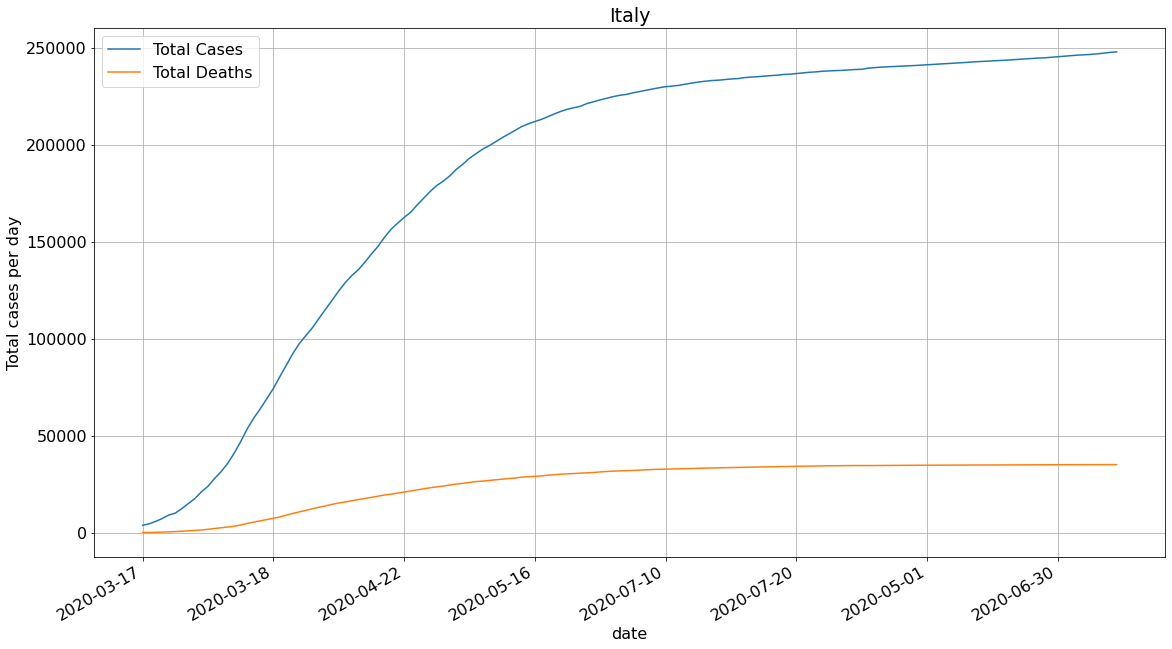

In [25]:
for index in range(len(dfCountry)):
    ax = dfTotalCases.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
    dfTotalDeaths.plot(ax=ax, x='date', y=[dfCountry[index]])
    
    plt.ylabel('Total cases per day')
    ax.legend(["Total Cases", "Total Deaths"]);
    plt.title(dfCountry[index])
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    plt.grid()

### Brazil Cases

In [26]:
dfBrazil = df[df['location'] == 'Brazil']
dfBrazil = dfBrazil.sort_values(by='date', ascending=True)
dfBrazil.reset_index(drop=True, inplace=True)
dfBrazil

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-06   Brazil          8.0           0.0        5.0         0.0
1   2020-03-07   Brazil         13.0           0.0        5.0         0.0
2   2020-03-08   Brazil         13.0           0.0        0.0         0.0
3   2020-03-09   Brazil         25.0           0.0       12.0         0.0
4   2020-03-10   Brazil         25.0           0.0        0.0         0.0
..         ...      ...          ...           ...        ...         ...
145 2020-07-29   Brazil    2483191.0       88539.0    40816.0       921.0
146 2020-07-30   Brazil    2552265.0       90134.0    69074.0      1595.0
147 2020-07-31   Brazil    2610102.0       91263.0    57837.0      1129.0
148 2020-08-01   Brazil    2662485.0       92475.0    52383.0      1212.0
149 2020-08-02   Brazil    2707877.0       93563.0    45392.0      1088.0

[150 rows x 6 columns]

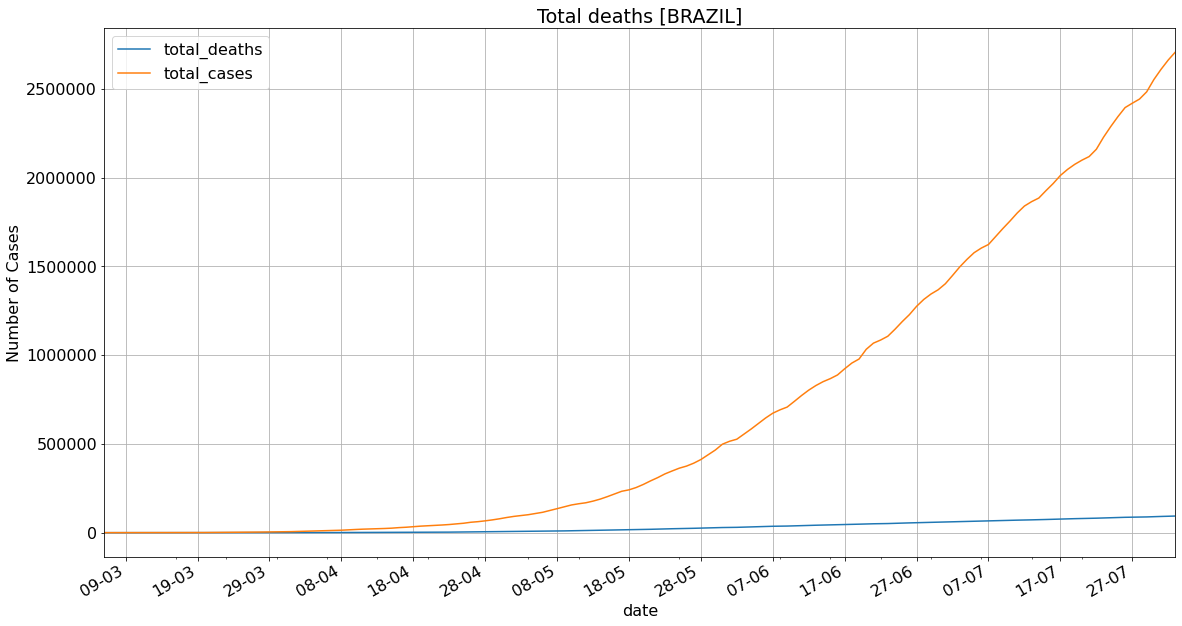

In [27]:
dfBrazil.plot(x='date', y=['total_deaths','total_cases'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total deaths [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

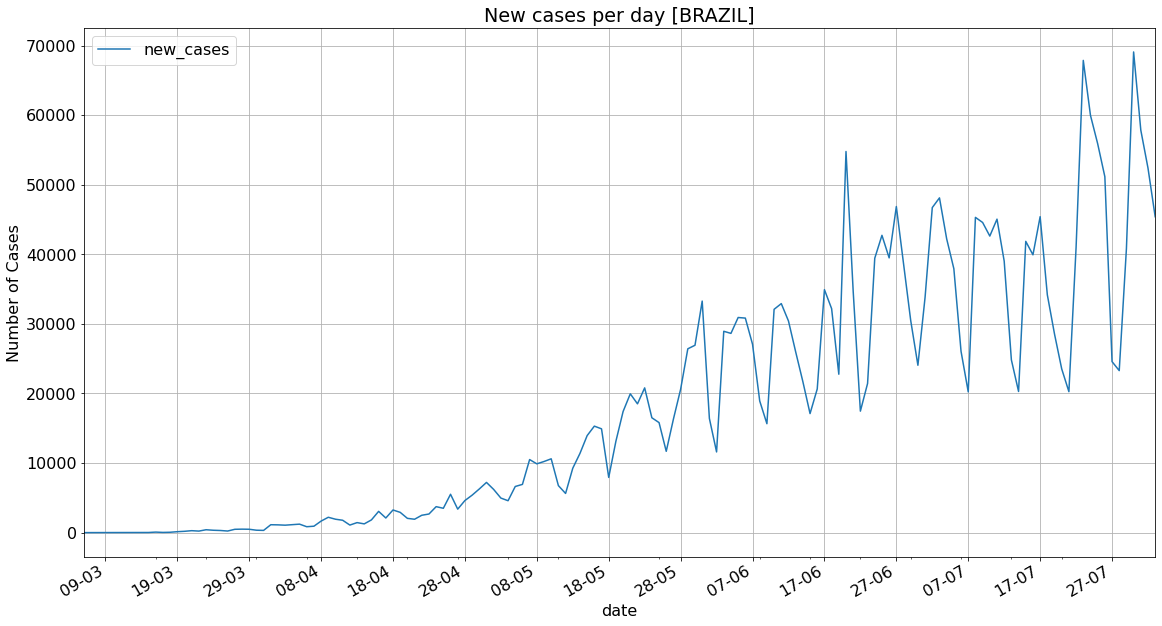

In [28]:
dfBrazil.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

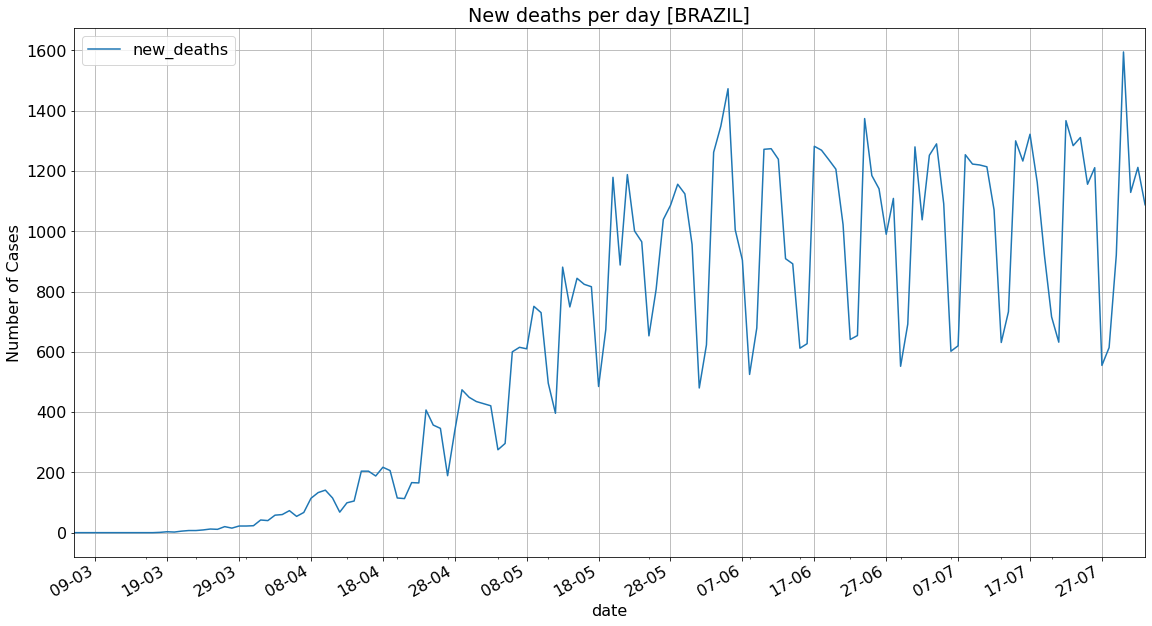

In [29]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [30]:
dfForecast = dfBrazil.copy()
dfForecast

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-06   Brazil          8.0           0.0        5.0         0.0
1   2020-03-07   Brazil         13.0           0.0        5.0         0.0
2   2020-03-08   Brazil         13.0           0.0        0.0         0.0
3   2020-03-09   Brazil         25.0           0.0       12.0         0.0
4   2020-03-10   Brazil         25.0           0.0        0.0         0.0
..         ...      ...          ...           ...        ...         ...
145 2020-07-29   Brazil    2483191.0       88539.0    40816.0       921.0
146 2020-07-30   Brazil    2552265.0       90134.0    69074.0      1595.0
147 2020-07-31   Brazil    2610102.0       91263.0    57837.0      1129.0
148 2020-08-01   Brazil    2662485.0       92475.0    52383.0      1212.0
149 2020-08-02   Brazil    2707877.0       93563.0    45392.0      1088.0

[150 rows x 6 columns]

In [31]:
dfForecast = dfBrazil.loc[:,['date','new_deaths']]
dfForecast

date  new_deaths
0   2020-03-06         0.0
1   2020-03-07         0.0
2   2020-03-08         0.0
3   2020-03-09         0.0
4   2020-03-10         0.0
..         ...         ...
145 2020-07-29       921.0
146 2020-07-30      1595.0
147 2020-07-31      1129.0
148 2020-08-01      1212.0
149 2020-08-02      1088.0

[150 rows x 2 columns]

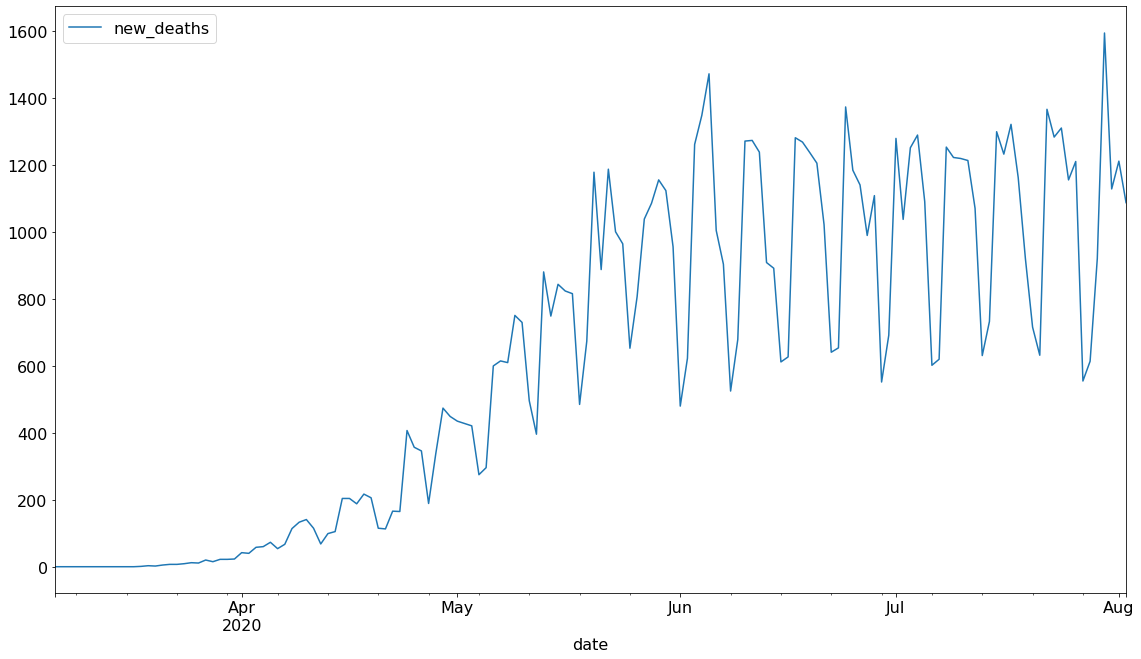

In [32]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

In [33]:
df_diff= dfForecast.copy()
df_diff['prev_cases'] = df_diff['new_deaths'].shift(1)

df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['new_deaths'] - df_diff['prev_cases'])

df_diff

date  new_deaths  prev_cases   diff
1   2020-03-07         0.0         0.0    0.0
2   2020-03-08         0.0         0.0    0.0
3   2020-03-09         0.0         0.0    0.0
4   2020-03-10         0.0         0.0    0.0
5   2020-03-11         0.0         0.0    0.0
..         ...         ...         ...    ...
145 2020-07-29       921.0       614.0  307.0
146 2020-07-30      1595.0       921.0  674.0
147 2020-07-31      1129.0      1595.0 -466.0
148 2020-08-01      1212.0      1129.0   83.0
149 2020-08-02      1088.0      1212.0 -124.0

[149 rows x 4 columns]

In [34]:
plot_data = [go.Scatter(x=df_diff['date'],y=df_diff['diff'])]
plot_layout = go.Layout(title='Montly Deaths Diff')
plot_layout = go.Figure(data=plot_data, layout=plot_layout)
plot_layout.show()

In [35]:
#fig = go.Figure([go.Bar(x=df_diff['date'], y=df_diff['diff'])])
#fig.show()

In [36]:
df_supervised = df_diff.drop(['prev_cases'],axis=1)

for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
    
df_supervised = df_supervised.dropna().reset_index(drop=True)
df_supervised

date  new_deaths   diff  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  \
0   2020-03-19         3.0    2.0    1.0    0.0    0.0    0.0    0.0    0.0   
1   2020-03-20         2.0   -1.0    2.0    1.0    0.0    0.0    0.0    0.0   
2   2020-03-21         5.0    3.0   -1.0    2.0    1.0    0.0    0.0    0.0   
3   2020-03-22         7.0    2.0    3.0   -1.0    2.0    1.0    0.0    0.0   
4   2020-03-23         7.0    0.0    2.0    3.0   -1.0    2.0    1.0    0.0   
..         ...         ...    ...    ...    ...    ...    ...    ...    ...   
132 2020-07-29       921.0  307.0   59.0 -656.0   55.0 -155.0   27.0  -83.0   
133 2020-07-30      1595.0  674.0  307.0   59.0 -656.0   55.0 -155.0   27.0   
134 2020-07-31      1129.0 -466.0  674.0  307.0   59.0 -656.0   55.0 -155.0   
135 2020-08-01      1212.0   83.0 -466.0  674.0  307.0   59.0 -656.0   55.0   
136 2020-08-02      1088.0 -124.0   83.0 -466.0  674.0  307.0   59.0 -656.0   

     lag_7  lag_8  lag_9  lag_10  lag_11  lag_12  
0      0.0    0.0    0.0     0.0     0.0     0.0  
1      0.0    0.0    0.0     0.0     0.0     0.0  
2      0.0    0.0    0.0     0.0     0.0     0.0  
3      0.0    0.0    0.0     0.0     0.0     0.0  
4      0.0    0.0    0.0     0.0     0.0     0.0  
..     ...    ...    ...     ...     ...     ...  
132  735.0  -84.0 -205.0  -242.0  -159.0    89.0  
133  -83.0  735.0  -84.0  -205.0  -242.0  -159.0  
134   27.0  -83.0  735.0   -84.0  -205.0  -242.0  
135 -155.0   27.0  -83.0   735.0   -84.0  -205.0  
136   55.0 -155.0   27.0   -83.0   735.0   -84.0  

[137 rows x 15 columns]

In [37]:
import statsmodels.formula.api as smf
model = smf.ols(formula='diff ~ lag_1', data=df_supervised)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

-0.0027383198706252276


In [38]:
model = smf.ols(formula='diff ~ lag_1 + lag_2 + lag_3 + lag_4 + lag_5 + lag_6 +lag_7+lag_8+lag_9+lag_10', data=df_supervised)
model_fit = model.fit()
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.7617970257499384


In [39]:
from sklearn.preprocessing import MinMaxScaler
df_model = df_supervised.drop(['new_deaths','date'],axis=1)#split train and test set
train_set, test_set = df_model[0:-10].values, df_model[-10:].values

In [40]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_set)
# reshape training set
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
train_set_scaled = scaler.transform(train_set)# reshape test set
test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
test_set_scaled = scaler.transform(test_set)

In [41]:
X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [42]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/100
125/125 [==============================] - 2s 18ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.1568 - val_mse: 0.1568
Epoch 2/100
125/125 [==============================] - 1s 6ms/step - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0547 - val_mse: 0.0547
Epoch 3/100
125/125 [==============================] - 1s 8ms/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 4/100
125/125 [==============================] - 1s 7ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0292 - val_mse: 0.0292
Epoch 5/100
125/125 [==============================] - 1s 7ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0230 - val_mse: 0.0230
Epoch 6/100
125/125 [==============================] - 1s 6ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 7/100
125/125 [==============================] - 1s 6ms/step - loss: 0.0249 - mse: 0.0249 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 8/100
125/125 [==============================] - 1s 7ms/step -

125/125 [==============================] - 1s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 63/100
125/125 [==============================] - 1s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 64/100
125/125 [==============================] - 1s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 65/100
125/125 [==============================] - 1s 7ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0639 - val_mse: 0.0639
Epoch 66/100
125/125 [==============================] - 1s 7ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.1179 - val_mse: 0.1179
Epoch 67/100
125/125 [==============================] - 1s 7ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.2015 - val_mse: 0.2015
Epoch 68/100
125/125 [==============================] - 1s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.1875 - val_mse: 0.1875
Epoch 69/100
125/125 [==============================] - 1s 7ms/step - loss:

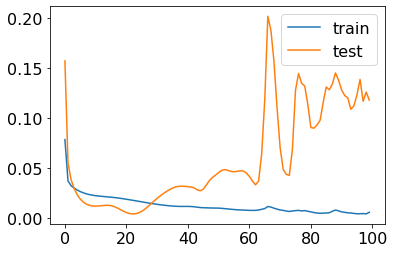

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [45]:
y_pred = model.predict(X_test,batch_size=1)

In [46]:
y_pred

array([[-0.08877885],
       [-0.48654073],
       [-0.11185582],
       [-1.1121011 ],
       [ 0.08398874],
       [ 0.761236  ],
       [-0.01592355],
       [-0.26732463],
       [ 0.06510971],
       [-0.7333585 ]], dtype=float32)

In [47]:
y_test

array([[-0.09597523],
       [-0.37770898],
       [-0.05263158],
       [-1.15325077],
       [-0.04643963],
       [ 0.3374613 ],
       [ 0.90557276],
       [-0.85913313],
       [-0.00928793],
       [-0.32972136]])

In [48]:
y_pred = y_pred.reshape(y_pred.shape[0], 1, y_pred.shape[1])#rebuild test set for inverse transform
pred_test_set = []
for index in range(0,len(y_pred)):
    print(np.concatenate([y_pred[index],X_test[index]],axis=1))
    pred_test_set.append(np.concatenate([y_pred[index],X_test[index]],axis=1))#reshape pred_test_set

pred_test_set = np.array(pred_test_set)
pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])#inverse transform
pred_test_set_inverted = scaler.inverse_transform(pred_test_set)

[[-0.08877885 -0.26625387  1.02349256 -0.25920125 -0.44870791 -0.50665623
  -0.37666406  0.01174628 -0.23257635  0.76037588  0.0321065  -0.81675803
  -0.35160532]]
[[-0.48654073 -0.09597523 -0.25763508  1.02349256 -0.25920125 -0.44870791
  -0.50665623 -0.37666406  0.01174628 -0.23257635  0.76037588  0.0321065
  -0.81675803]]
[[-0.11185582 -0.37770898 -0.0853563  -0.25763508  1.02349256 -0.25920125
  -0.44870791 -0.50665623 -0.37666406  0.01174628 -0.23257635  0.76037588
   0.0321065 ]]
[[-1.11210108 -0.05263158 -0.37039937 -0.0853563  -0.25763508  1.02349256
  -0.25920125 -0.44870791 -0.50665623 -0.37666406  0.01174628 -0.23257635
   0.76037588]]
[[ 0.08398874 -1.15325077 -0.04150352 -0.37039937 -0.0853563  -0.25763508
   1.02349256 -0.25920125 -0.44870791 -0.50665623 -0.37666406  0.01174628
  -0.23257635]]
[[ 0.76123601 -0.04643963 -1.1550509  -0.04150352 -0.37039937 -0.0853563
  -0.25763508  1.02349256 -0.25920125 -0.44870791 -0.50665623 -0.37666406
   0.01174628]]
[[-0.01592355  0.3

In [49]:
result_list = []
sales_dates = list(dfForecast[-11:].date)
act_sales = list(dfForecast[-11:].new_deaths)
for index in range(0,len(pred_test_set_inverted)):
    result_dict = {}
    result_dict['pred_value'] = int(pred_test_set_inverted[index][0] + act_sales[index])
    result_dict['date'] = sales_dates[index+1]
    result_list.append(result_dict)
df_result = pd.DataFrame(result_list)#for multistep prediction, replace act_sales with the predicted sales

In [50]:
df_result

pred_value       date
0        1315 2020-07-24
1        1085 2020-07-25
2        1172 2020-07-26
3         581 2020-07-27
4         698 2020-07-28
5        1194 2020-07-29
6         999 2020-07-30
7        1511 2020-07-31
8        1260 2020-08-01
9         827 2020-08-02

In [51]:
df_deaths_pred = pd.merge(dfForecast, df_result, on='date', how='left')

plot_data = [go.Scatter(x=df_deaths_pred['date'], y=df_deaths_pred['new_deaths'], name='actual'),
            go.Scatter(x=df_deaths_pred['date'], y=df_deaths_pred['pred_value'], name='predicted')
            ]

plot_layout = go.Layout(title='Deaths Prediction')

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [52]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual  Predicted
0 -0.09598   -0.08878
1 -0.37771   -0.48654
2 -0.05263   -0.11186
3 -1.15325   -1.11210
4 -0.04644    0.08399
5  0.33746    0.76124
6  0.90557   -0.01592
7 -0.85913   -0.26732
8 -0.00929    0.06511
9 -0.32972   -0.73336

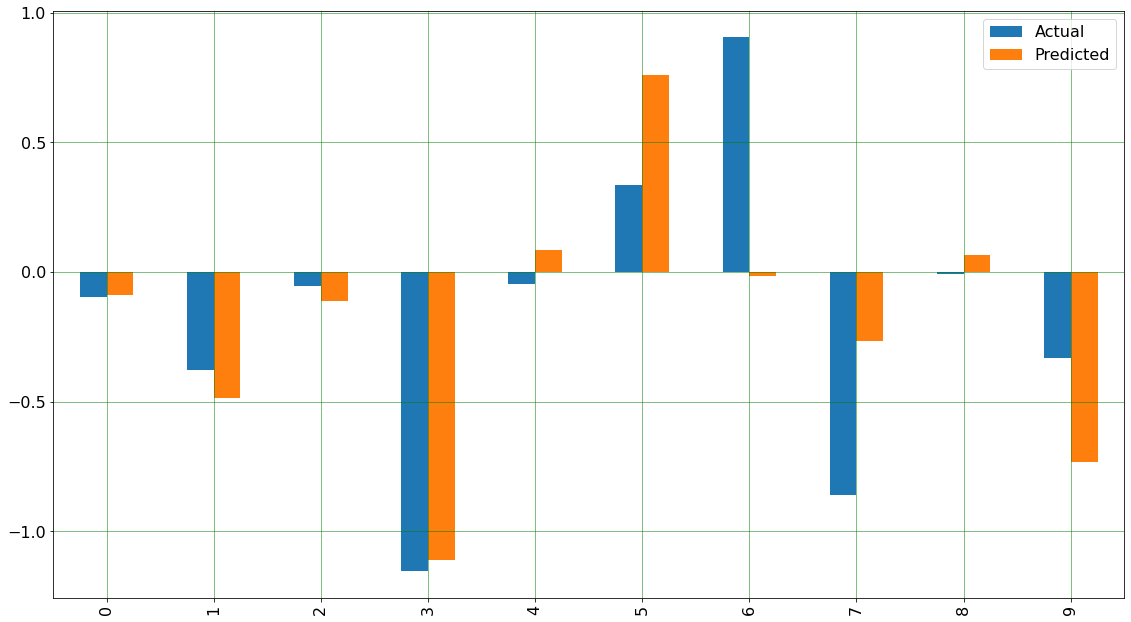

In [53]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Forecast to new deaths in World

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [54]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

date  new_deaths
0     2020-3-9       228.0
1    2020-3-10       208.0
2    2020-3-11       273.0
3    2020-3-12       326.0
4    2020-3-13       350.0
..         ...         ...
142  2020-7-29      6260.0
143  2020-7-30      6719.0
144  2020-7-31      6431.0
145   2020-8-1      6209.0
146   2020-8-2      5779.0

[147 rows x 2 columns]

In [55]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [56]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [57]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

110 37


In [58]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [59]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [60]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [61]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [62]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
11/11 [==============================] - 1s 90ms/step - loss: 0.1690 - mse: 0.1690 - val_loss: 0.1794 - val_mse: 0.1794
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 0.1225 - mse: 0.1225 - val_loss: 0.1274 - val_mse: 0.1274
Epoch 3/50
11/11 [==============================] - 0s 16ms/step - loss: 0.0833 - mse: 0.0833 - val_loss: 0.0829 - val_mse: 0.0829
Epoch 4/50
11/11 [==============================] - 0s 15ms/step - loss: 0.0529 - mse: 0.0529 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 5/50
11/11 [==============================] - 0s 15ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 7/50
11/11 [==============================] - 0s 15ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 8/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0196 - m

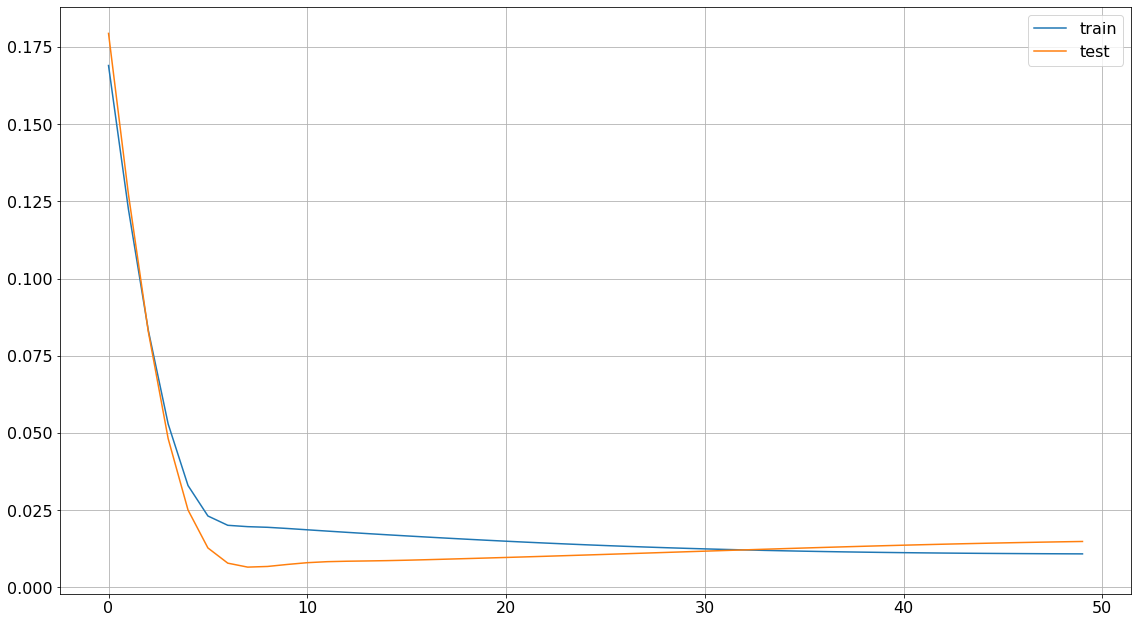

In [63]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [64]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [65]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [66]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1070.58 RMSE
Test Score: 1243.96 RMSE


In [67]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [68]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

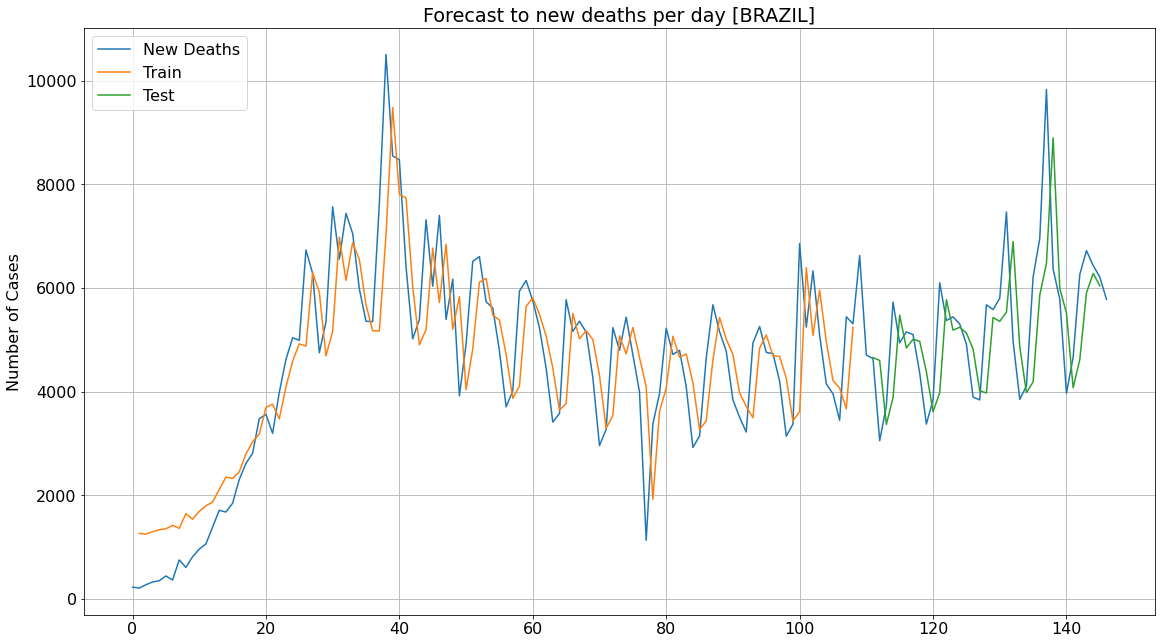

In [69]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to new deaths per day [BRAZIL]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

In [70]:
df

date              location  total_cases  total_deaths  new_cases  \
21514 2020-03-17               Myanmar          0.0           0.0        0.0   
24118 2020-04-06      Papua New Guinea          1.0           0.0        0.0   
24117 2020-04-05      Papua New Guinea          1.0           0.0        0.0   
24116 2020-04-04      Papua New Guinea          1.0           0.0        0.0   
24115 2020-04-03      Papua New Guinea          1.0           0.0        0.0   
...          ...                   ...          ...           ...        ...   
31987 2020-03-07  United Arab Emirates          NaN           NaN        NaN   
31989 2020-03-09  United Arab Emirates          NaN           NaN        NaN   
31992 2020-03-12  United Arab Emirates          NaN           NaN        NaN   
31994 2020-03-14  United Arab Emirates          NaN           NaN        NaN   
33327 2020-03-06               Vietnam          NaN           NaN        NaN   

       new_deaths  
21514         0.0  
24118         0.0  
24117         0.0  
24116         0.0  
24115         0.0  
...           ...  
31987         NaN  
31989         NaN  
31992         NaN  
31994         NaN  
33327         NaN  

[29622 rows x 6 columns]

### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

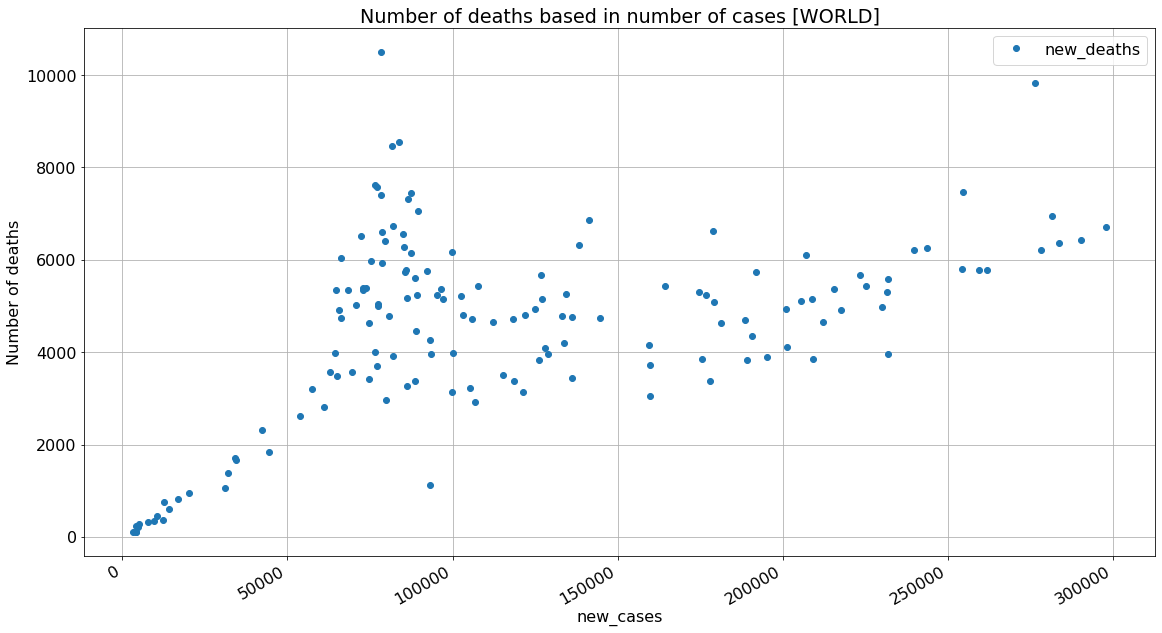

In [71]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

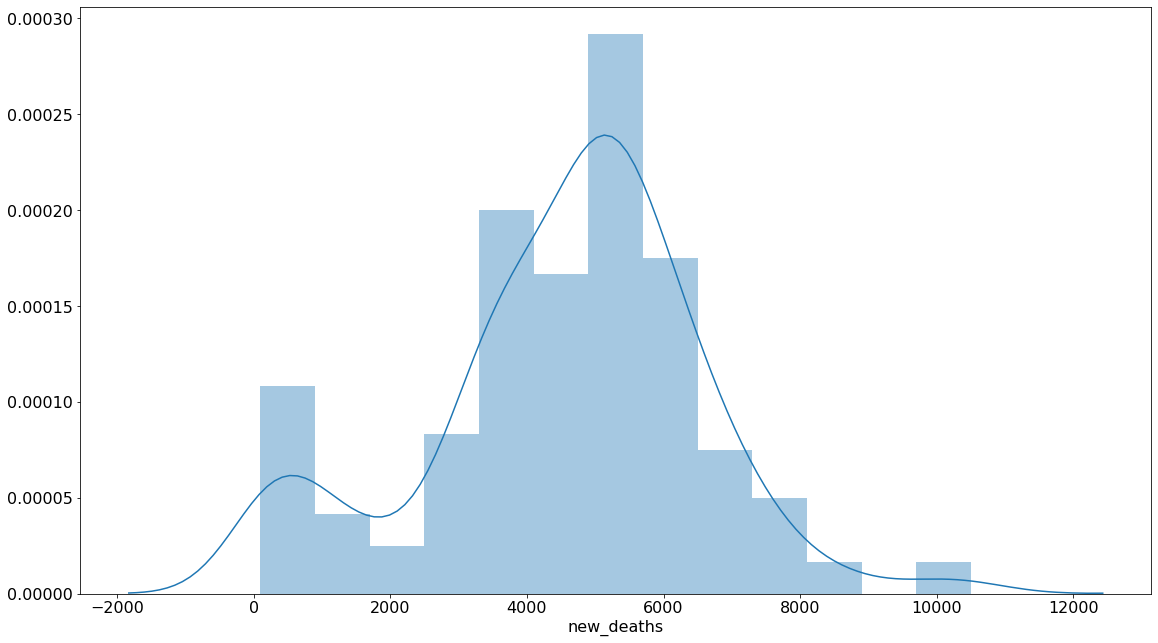

In [72]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [73]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [75]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
print(regressor.intercept_)

[34762.18656612]


In [77]:
print(regressor.coef_)

[[17.73473144]]


In [78]:
y_pred = regressor.predict(X_test)

In [79]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual     Predicted
0   181272.0  116980.40150
1    87515.0  143688.90705
2    76992.0  168925.42988
3   159618.0  108290.38310
4     9458.0   40969.34257
..       ...           ...
55  254489.0  137641.36363
56  179101.0  125049.70431
57  298122.0  153921.84708
58   72820.0  130352.38901
59  290327.0  148814.24443

[60 rows x 2 columns]

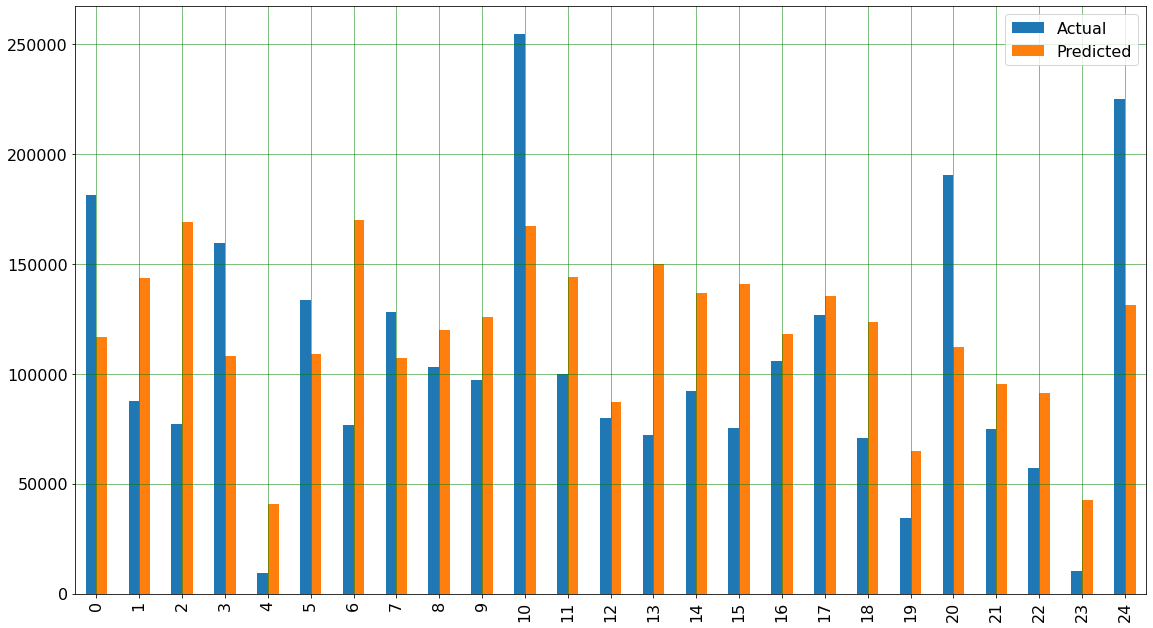

In [80]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

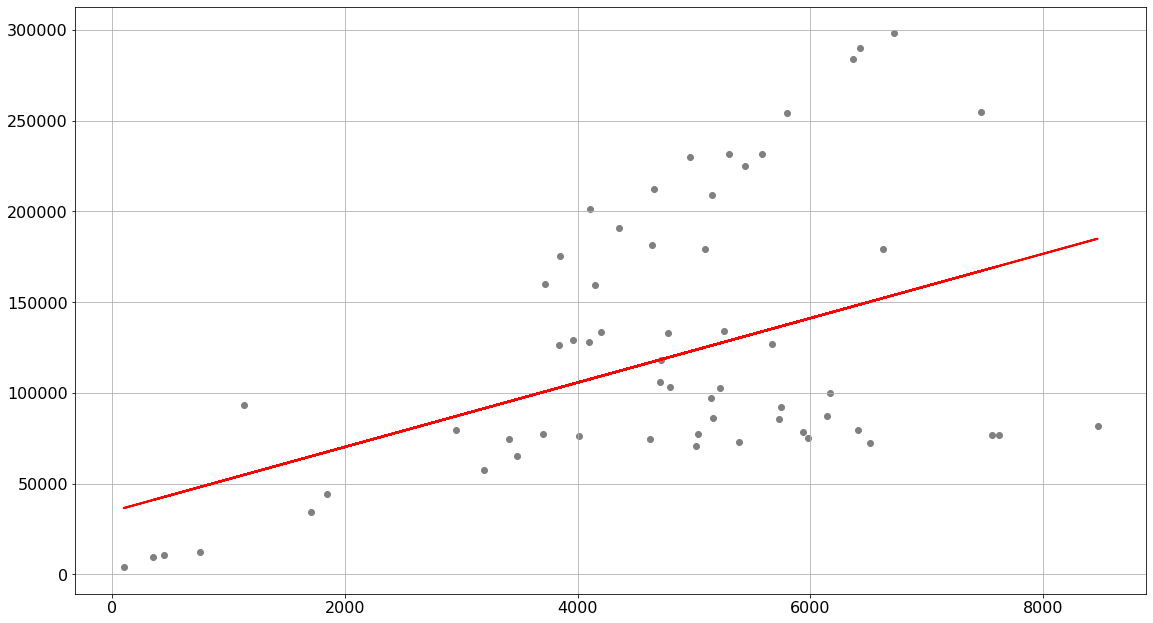

In [81]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 54637.743229165746
Mean Squared Error: 4249597961.2496653
Root Mean Squared Error: 4249597961.2496653


### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [83]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

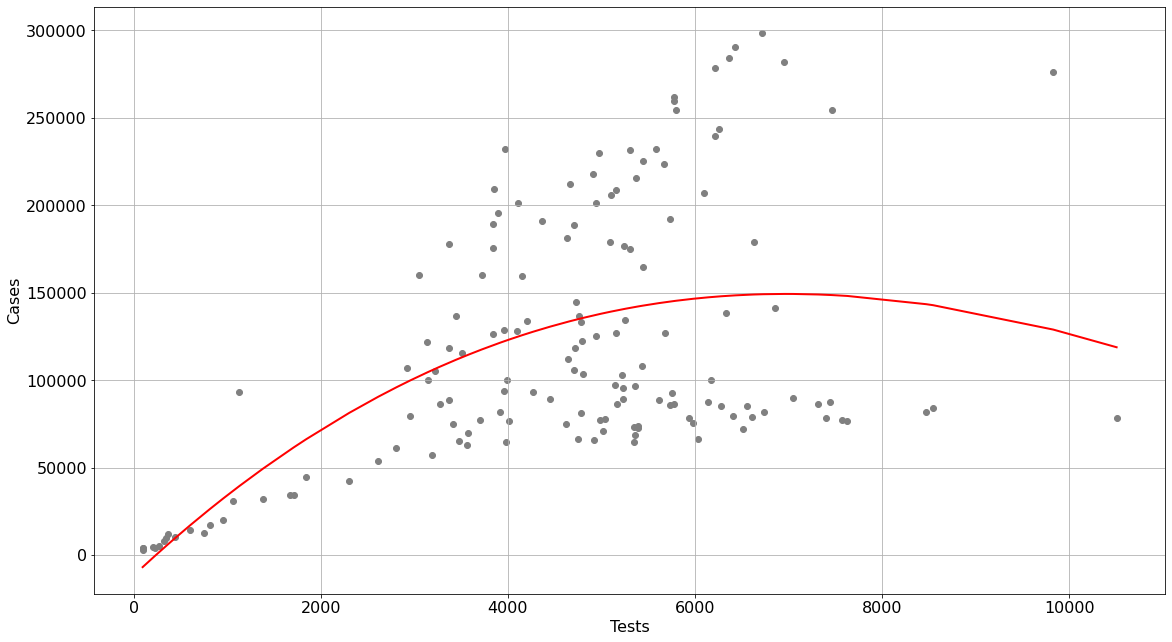

In [84]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()

In [85]:
#newDf_list=[]
#for index in range(len(dfCountry)):  
#    newDf = [d[index]['total_cases']]
#    header = [dfCountry[index]]
#    newDf = pd.concat(newDf, axis=1, keys=header)
#    newDf_list.append(newDf)

In [86]:
#dfConcat = []
#for index in range(len(dfCountry)):
#    dfConcat = pd.concat(newDf_list, axis=1)
#dfConcat.insert(0, 'date', myDate)
#dfConcat.sort_values(by=['date'], ascending=False)

In [87]:
# for index in range(len(dfCountry)):
#     dfTotalCases.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
#     plt.ylabel('Total cases per day')
    
#     ax = plt.gca()
#     plt.gcf().autofmt_xdate()
#     plt.grid()